<a href="https://colab.research.google.com/github/coopaloop536/Cooper_CO2_Emissions/blob/main/CO2_Emissions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt


In [2]:
url = 'https://pasteur.epa.gov/uploads/10.23719/1531143/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv'
df = pd.read_csv(url)
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [5]:
renamed_columns = {'2017 NAICS Code':'NAICS Code', '2017 NAICS Title':'Industry Title', 'GHG':'Greenhouse Gas Type', 'Unit':'Gas/USD', 'Supply Chain Emission Factors without Margins':'Emissions per Dollar w/ no Margains', 'Margins of Supply Chain Emission Factors':'Margins', 'Supply Chain Emission Factors with Margins':'Emissions per Dollar w/ Margains'}

df = df.rename(columns=renamed_columns)

df['NAICS Code'] = pd.to_numeric(df['NAICS Code'], errors='coerce') ## NAICS Code turns into a numeric datatype

df = df.dropna(subset=['NAICS Code']) ## Drops any rows that are missing NAICS Code

df['NAICS Code'] = df['NAICS Code'].astype(int) ## Turns NAICS Code into an integer because sometimes there's floats

df['NAICS Code'] = df['NAICS Code'].astype(str).str.zfill(6) ## Makes sure the NAICS Code is always 6 digits long because somewhere in the dataset there is a sub-6-digit NAICS Code

def truncate_naics(naics_code, digits=2): ## Truncates the NAICS Code to the specified number of digits which is 2 in this case
    return naics_code[:digits]

grouped_2digit = df.groupby(df['NAICS Code'].apply(lambda x: truncate_naics(x, digits=2)))['Emissions per Dollar w/ Margains'].mean() ## Groups the data by the first 2 digits of the NAICS Code and calculates the average emissions per dollar

grouped_2digit = grouped_2digit.sort_values(ascending=False) ## Sorts the data by the average emissions per dollar in descending order


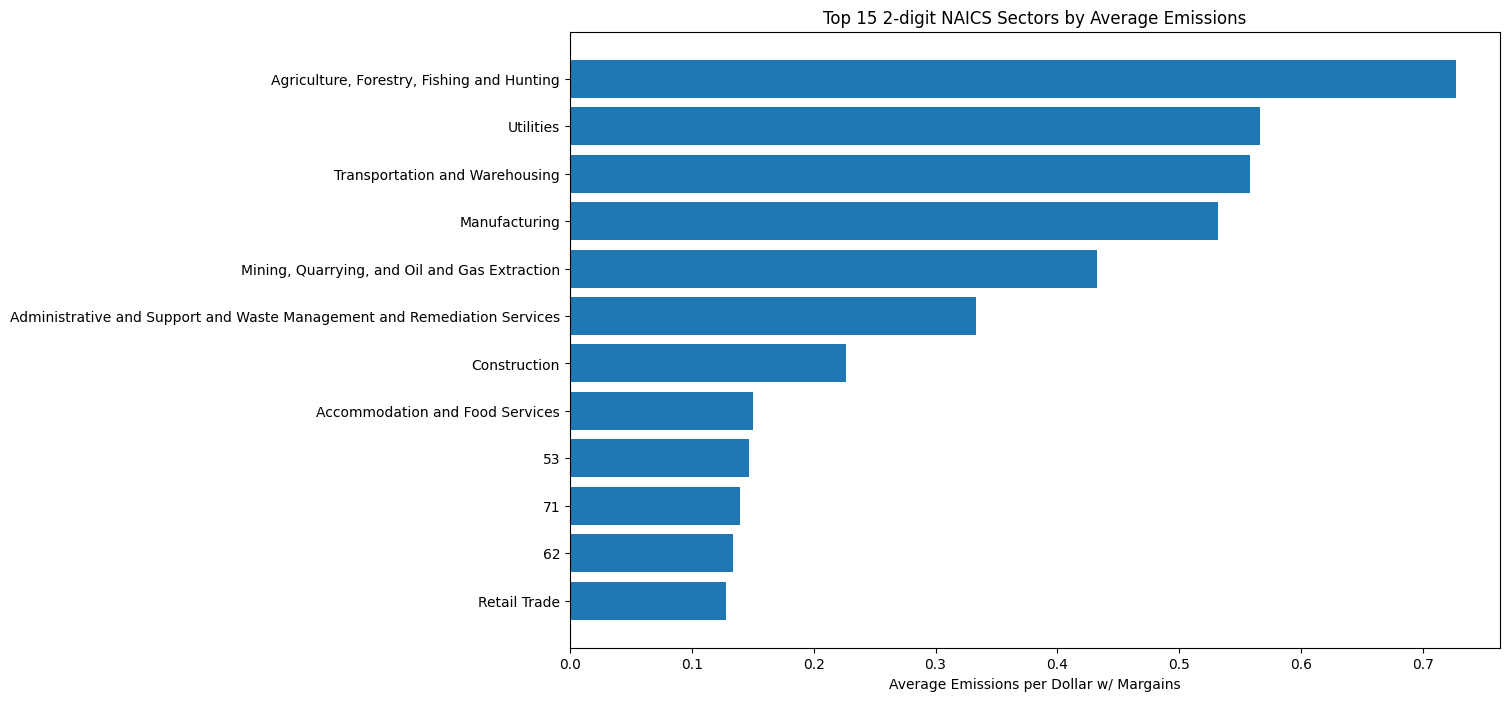

In [7]:
naics_2digit_names = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '49': 'Transportation and Warehousing',
    '72': 'Accommodation and Food Services'
    }

labels = [naics_2digit_names.get(key, key) for key in grouped_2digit.index]
plt.figure(figsize=(12, 8))
plt.barh(labels[:15], grouped_2digit.head(15))  # top 15 sectors

plt.xlabel('Average Emissions per Dollar w/ Margains')
plt.title('Top 15 2-digit NAICS Sectors by Average Emissions')
plt.gca().invert_yaxis()  # Highest emission on top
plt.show()